In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [76]:
#NO MAJOR IMPURITIES
df = pd.read_csv("USA_Housing.csv")
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [ ]:
#EDA - Undertstand the dataset - Exploratory Data Analytics
#Perform preprocessing - Including what we see today..

In [77]:
df.isna().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [ ]:
#1. VIF - Analysis 
#2. Model fitting works with - Stages - SKLEARN

In [78]:
df = df.drop(columns = 'Address')

In [7]:
X = df.drop(columns = ['Price'])

In [79]:
X=df

In [80]:
X

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05
...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06


<Axes: xlabel='Avg. Area House Age', ylabel='Price'>

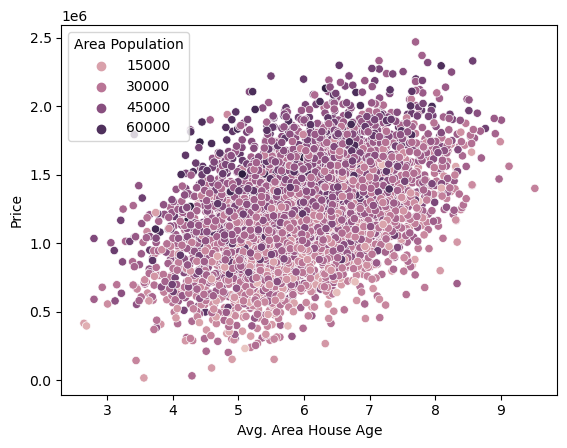

In [87]:
sns.scatterplot(data=df,x='Avg. Area House Age',y='Price',hue='Area Population')

In [88]:
df.corr()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


<Axes: >

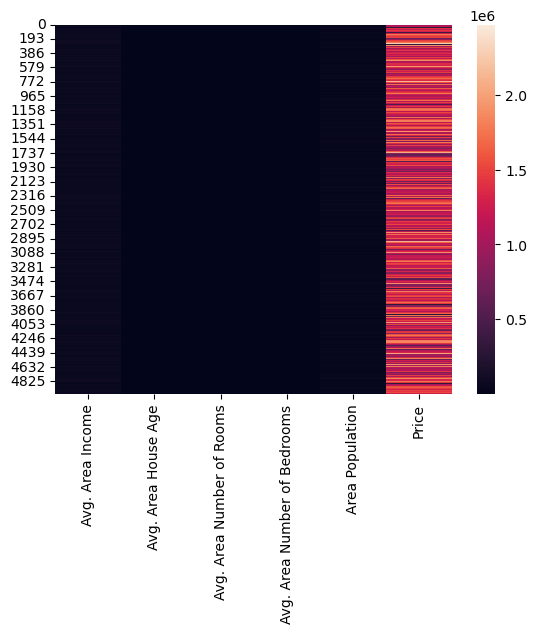

In [91]:
sns.heatmap(X)

In [48]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

In [50]:
scaled_data

array([[ 1.02865969, -0.29692705,  0.08806222, -1.31759867],
       [ 1.00080775,  0.02590164, -0.72230146,  0.40399945],
       [-0.68462916, -0.11230283,  0.93084045,  0.07240989],
       ...,
       [-0.48723454,  1.28447022, -1.50025059, -0.29193658],
       [-0.05459152, -0.44669439,  1.18205319,  0.65111608],
       [-0.28831272,  0.01521477,  0.07185495,  1.04162464]])

In [9]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [53]:
vif_df = pd.DataFrame()
vif_df['features'] = X.columns

vif_df['VIF'] = [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]

In [11]:
X.values

array([[7.95454586e+04, 5.68286132e+00, 7.00918814e+00, 4.09000000e+00,
        2.30868005e+04],
       [7.92486425e+04, 6.00289981e+00, 6.73082102e+00, 3.09000000e+00,
        4.01730722e+04],
       [6.12870672e+04, 5.86588984e+00, 8.51272743e+00, 5.13000000e+00,
        3.68821594e+04],
       ...,
       [6.33906869e+04, 7.25059061e+00, 4.80508098e+00, 2.13000000e+00,
        3.32661455e+04],
       [6.80013312e+04, 5.53438842e+00, 7.13014386e+00, 5.44000000e+00,
        4.26256202e+04],
       [6.55105818e+04, 5.99230531e+00, 6.79233610e+00, 4.07000000e+00,
        4.65012838e+04]])

In [13]:
variance_inflation_factor?

In [15]:
vif_df

,features,VIF
0,Avg. Area Income,29.650899
1,Avg. Area House Age,27.447775
2,Avg. Area Number of Rooms,45.257291
3,Avg. Area Number of Bedrooms,14.537873
4,Area Population,12.825450


In [16]:
X = df.drop(columns = ['Price','Avg. Area Number of Rooms'])

In [17]:
X

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Bedrooms,Area Population
0,79545.458574,5.682861,4.09,23086.800503
1,79248.642455,6.002900,3.09,40173.072174
2,61287.067179,5.865890,5.13,36882.159400
3,63345.240046,7.188236,3.26,34310.242831
4,59982.197226,5.040555,4.23,26354.109472
...,...,...,...,...
4995,60567.944140,7.830362,3.46,22837.361035
4996,78491.275435,6.999135,4.02,25616.115489
4997,63390.686886,7.250591,2.13,33266.145490
4998,68001.331235,5.534388,5.44,42625.620156


In [ ]:
plt.scatter('')

In [18]:
vif_df = pd.DataFrame()
vif_df['features'] = X.columns

vif_df['VIF'] = [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]

In [17]:
variance_inflation_factor?

In [37]:
vif_df

,features,VIF
0,Avg. Area Income,25.439000
1,Avg. Area House Age,23.985721
2,Avg. Area Number of Bedrooms,10.329442
3,Area Population,12.164700


In [ ]:
#Ratio = Avg. Area Income Avg. / Area Number of Bedrooms	 

In [20]:
from sklearn.model_selection import train_test_split

In [54]:
X_train, X_test, y_train, y_test  = train_test_split(scaled_data,df['Price'], test_size = 0.25, shuffle = True)

In [22]:
X_train

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Bedrooms,Area Population
2600,58229.768529,4.685217,5.03,44972.031359
3745,64336.176303,6.240716,4.26,43218.175160
771,78785.277271,6.606067,2.12,33603.484156
2448,86583.933661,6.096278,5.16,45514.147768
4442,64201.503172,5.174681,3.42,23252.164589
...,...,...,...,...
2646,72661.750127,6.472277,4.18,47048.490008
1460,65069.901721,6.169046,3.45,36778.292640
3611,96216.954271,5.169125,6.20,42296.419954
4161,78054.145516,6.929277,2.45,16143.664966


In [55]:
X_train

array([[ 1.38079924, -1.29335899, -0.52781418, -0.25253031],
       [ 0.54599146, -0.71894812, -1.47593968, -1.02251712],
       [ 1.03680523, -0.71002256,  1.13343137,  0.19251286],
       ...,
       [ 0.83261188,  1.22212733, -0.56022872,  0.94899049],
       [ 0.25707267,  0.33395956, -1.22472694, -1.02924175],
       [ 0.57455517, -0.982385  , -1.56507968,  0.35437931]])

In [ ]:
#Model - Is intelligent - It knows how to learn 
#Studies 
#Fit all data - Evaluate on the same  - 90%
#take data - Train - Fit on this data 
#Evaluation on #Test- Algorithm will never see for traning 
  #Questions: questions alone - Whole syllabus?
  #IDEAL - 70% of total dataset - TRAIN - 30% of the total dataset - TEST - Train and Test Tradeoff # 75-25
  #80- 20 : 90 - 10 

In [26]:
## Model iniitalization 
model = LinearRegression() #Parameters will have model specific defenition - Algorithm 

In [56]:
mod = LinearRegression()#created another object mod for scaled data

In [27]:
## MOdel Fitting 
model.fit(X_train, y_train)

LinearRegression()

In [57]:
mod.fit(X_train,y_train)#fitted on scaled data

LinearRegression()

In [28]:
model.coef_

array([2.11864217e+01, 1.64705370e+05, 4.70930526e+04, 1.52253455e+01])

In [58]:
mod.coef_#coefficient for scaled data

array([226273.19433638, 161393.39322584,  58155.34403034, 150999.8637422 ])

In [29]:
model.intercept_

-1944809.8533075806

In [59]:
mod.intercept_#intercept for scaled data

1233629.6086370929

In [30]:
y_predicted_train = model.predict(X_train)

In [60]:
y_predict_train = mod.predict(X_train)#prediction for scaled train data

In [39]:
y_predicted_Test = model.predict(X_test)

In [61]:
y_predict_Test = mod.predict(X_test)#prediction for scaled test data

In [40]:
print("The train MSE is:",mean_squared_error(y_train,y_predicted_train))
print("The test MSE is:",mean_squared_error(y_test,y_predicted_Test))

The train MSE is: 21910123729.396324
The test MSE is: 21427018946.778694


In [62]:
print("train MSE:",mean_squared_error(y_train,y_predict_train))
print("test MSE:",mean_squared_error(y_test,y_predict_Test))

train MSE: 21326618436.947193
test MSE: 23181538596.502705


In [41]:
print("The train RMSSE is:",np.sqrt(mean_squared_error(y_train,y_predicted_train)))
print("The test RMSSE is:",np.sqrt(mean_squared_error(y_test,y_predicted_Test)))

The train RMSSE is: 148020.68682922778
The test RMSSE is: 146379.7081114001


In [63]:
print("train MSE:",np.sqrt(mean_squared_error(y_train,y_predict_train)))
print("test MSE:",np.sqrt(mean_squared_error(y_test,y_predict_Test)))

train MSE: 146036.35998253035
test MSE: 152254.8475303913


In [36]:
r2_score(y_train,y_predicted_train)

0.8239620762466162

In [64]:
r2_score(y_train,y_predict_train)

0.8283899313164809

In [44]:
r2_score(y_test,y_predicted_Test)

0.8289165887893027

In [65]:
r2_score(y_test,y_predict_Test)

0.8154272938718342

C:\Users\91866\AppData\Local\Temp\ipykernel_10044\3957886223.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Deviations)


<Axes: xlabel='Price', ylabel='Density'>

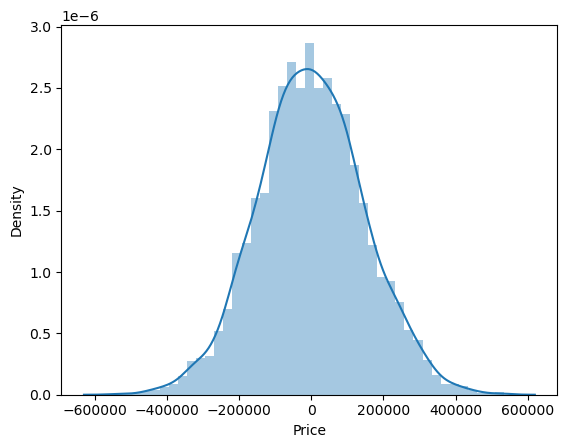

In [45]:
Deviations = y_train - y_predicted_train 
sns.distplot(Deviations)

C:\Users\91866\AppData\Local\Temp\ipykernel_10044\1873275852.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Deviation)


<Axes: xlabel='Price', ylabel='Density'>

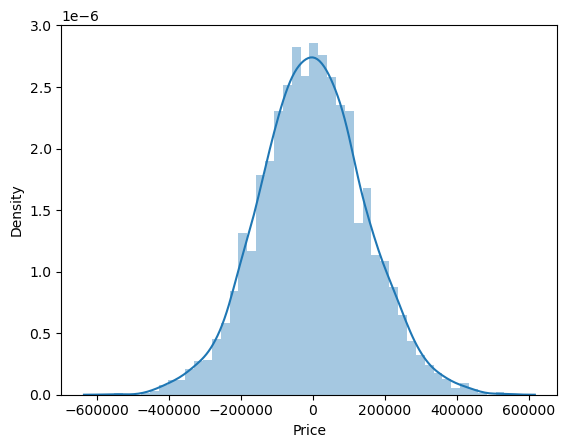

In [66]:
Deviation = y_train - y_predict_train 
sns.distplot(Deviation)

C:\Users\91866\AppData\Local\Temp\ipykernel_10044\1766068588.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(deviations)


<Axes: xlabel='Price', ylabel='Density'>

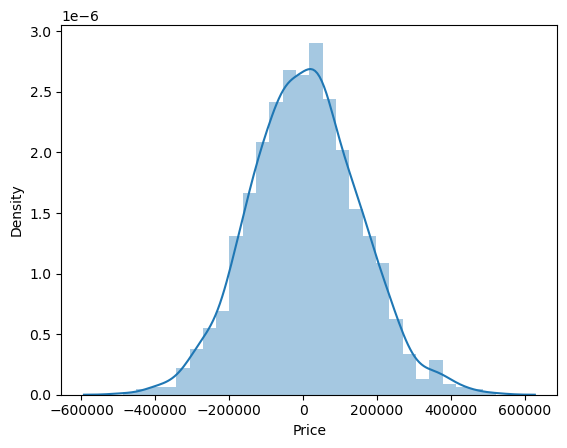

In [46]:
deviations = y_test - y_predicted_Test 
sns.distplot(deviations)